Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

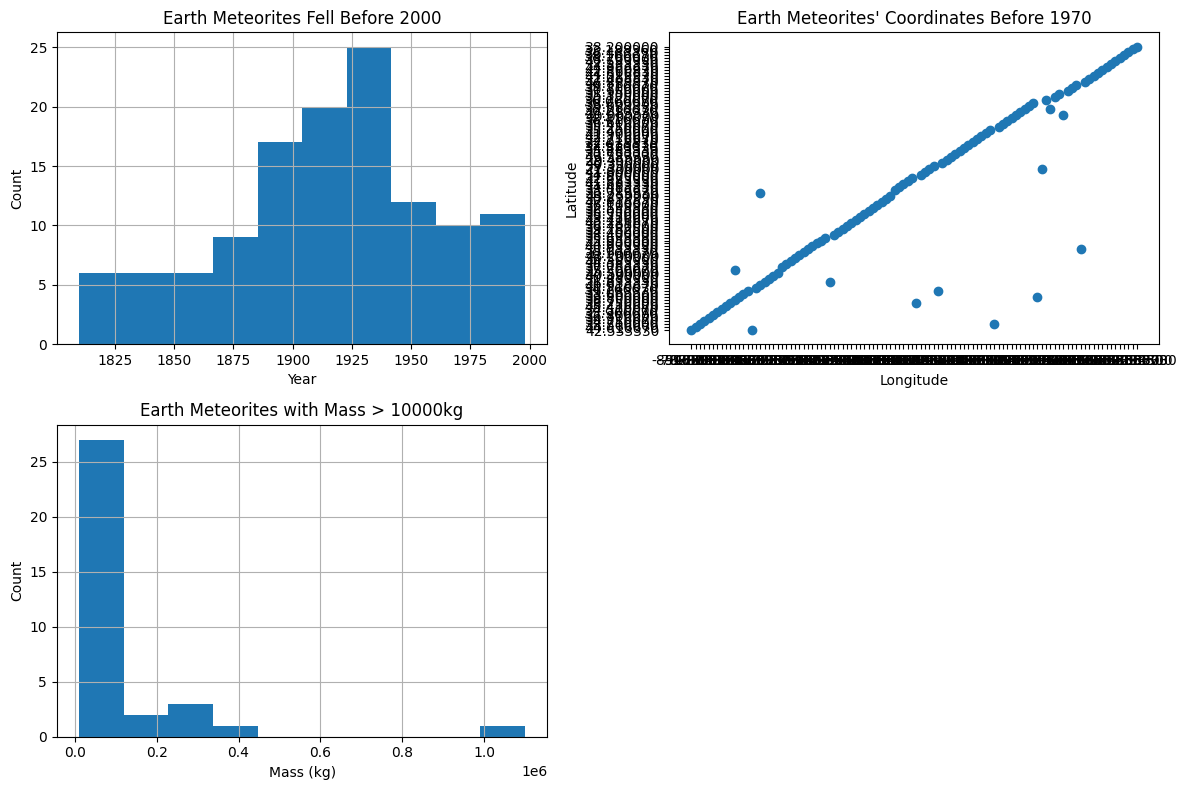

In [8]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

def download_data(url):
    response = requests.get(url)  # Send a GET request to the URL
    data = response.json()  # Get the JSON data from the response
    return data

def convert_to_dataframe(data):
    # Create a DataFrame from the data
    df = pd.DataFrame(data)
    return df

def analyze_data(df):
    # Get all the Earth meteorites that fell before the year 2000
    # Convert the 'date' column to datetime object
    #df['year'] = pd.to_datetime(df['year'].str.strip('{}'))

    # Extract the year from the datetime object
    df.dropna(inplace=True)
    df['year'] = df['year'].str[:4]
    df['year'] = df['year'].astype('int')
    meteorites_before_2000 = df[df['year'] < 2000]
    
    # Get the Earth meteorites' coordinates that fell before the year 1970
    meteorites_coordinates_before_1970 = df[df['year'] < 1970][['reclat', 'reclong']]
    
    df['mass'] = df['mass'].astype('float')
    # Get the Earth meteorites whose mass was more than 10000kg
    meteorites_mass_more_than_10000kg = df[df['mass'] > 10000]
    
    return meteorites_before_2000, meteorites_coordinates_before_1970, meteorites_mass_more_than_10000kg

def plot_analysis(meteorites_before_2000, meteorites_coordinates_before_1970, meteorites_mass_more_than_10000kg):
    # Plotting the analysis results
    plt.figure(figsize=(12, 8))
    
    # Plot 1: Earth meteorites that fell before the year 2000
    plt.subplot(221)
    plt.title("Earth Meteorites Fell Before 2000")
    meteorites_before_2000['year'].hist()
    plt.xlabel("Year")
    plt.ylabel("Count")
    
    # Plot 2: Earth meteorites' coordinates that fell before the year 1970
    plt.subplot(222)
    plt.title("Earth Meteorites' Coordinates Before 1970")
    plt.scatter(meteorites_coordinates_before_1970['reclong'], meteorites_coordinates_before_1970['reclat'])
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    
    # Plot 3: Earth meteorites whose mass was more than 10000kg
    plt.subplot(223)
    plt.title("Earth Meteorites with Mass > 10000kg")
    meteorites_mass_more_than_10000kg['mass'].hist()
    plt.xlabel("Mass (kg)")
    plt.ylabel("Count")
    
    # Adjust the subplots layout
    plt.tight_layout()

# Provide the URL of the data
url = "https://data.nasa.gov/resource/y77d-th95.json"

# Download the data
data = download_data(url)

# Convert the data into a DataFrame
df = convert_to_dataframe(data)

# Analyze the data
meteorites_before_2000, meteorites_coordinates_before_1970, meteorites_mass_more_than_10000kg = analyze_data(df)

# Plot the analysis results
plot_analysis(meteorites_before_2000, meteorites_coordinates_before_1970, meteorites_mass_more_than_10000kg)

# Show the plots
plt.show()


In [3]:
df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976-01-01T00:00:00.000,16.883330,-99.900000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",NaN,NaN
4,Achiras,370,Valid,L6,780,Fell,1902-01-01T00:00:00.000,-33.166670,-64.950000,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,230,Fell,1934-01-01T00:00:00.000,13.633330,79.416670,"{'type': 'Point', 'coordinates': [79.41667, 13...",NaN,NaN
996,Tissint,54823,Valid,Martian (shergottite),7000,Fell,2011-01-01T00:00:00.000,29.481950,-7.611230,"{'type': 'Point', 'coordinates': [-7.61123, 29...",NaN,NaN
997,Tjabe,24011,Valid,H6,20000,Fell,1869-01-01T00:00:00.000,-7.083330,111.533330,"{'type': 'Point', 'coordinates': [111.53333, -...",NaN,NaN
998,Tjerebon,24012,Valid,L5,16500,Fell,1922-01-01T00:00:00.000,-6.666670,106.583330,"{'type': 'Point', 'coordinates': [106.58333, -...",NaN,NaN
